# Homework 4

## References

+ Lectures 13-16 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [4]:
MAKE_BOOK_FIGURES=True
import numpy as np
import scipy.stats as st

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,

        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,

        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,

        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,

        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Remove legend frame
        'legend.frameon': False,

        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,

        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,

        # Layout settings
        'figure.constrained_layout.use': True,

        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Remove legend frame
        'legend.frameon': False,

        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.

    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'

    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

## Student details

+ **First Name:** Ekene
+ **Last Name:** Mba
+ **Email:** emba@purdue.edu

# Problem 1 - Estimating the mechanical properties of a plastic material from molecular dynamics simulations

First, make sure that [this](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/stress_strain.txt) dataset is visible from this Jupyter notebook.
You may achieve this by either:

+ Downloading the data file and then manually upload it on Google Colab. The easiest way is to click on the folder icon on the left of the browser window and click on the upload button (or drag and drop the file). Some other options are [here](https://colab.research.google.com/notebooks/io.ipynb).
+ Downloading the file to the working directory of this notebook with this code:

In [6]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/stress_strain.txt"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


It's up to you what you choose to do.
If the file is in the right place, the following code should work:

In [7]:
data =  np.loadtxt('https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/stress_strain.txt')

The dataset was generated using a molecular dynamics simulation of a plastic material (thanks to [Professor Alejandro Strachan](https://engineering.purdue.edu/MSE/people/ptProfile?id=33239) for sharing the data!).
Specifically, Strachan's group did the following:
- They took a rectangular chunk of the material and marked the position of each one of its atoms;
- They started applying a tensile force along one dimension.
The atoms are coupled together through electromagnetic forces, and they must all satisfy Newton's law of motion.
- For each value of the applied tensile force, they marked the stress (force be unit area) in the middle of the material and the corresponding strain of the material (percent elongation in the pulling direction).
- Eventually, the material entered the plastic regime and broke.
Here is a visualization of the data:

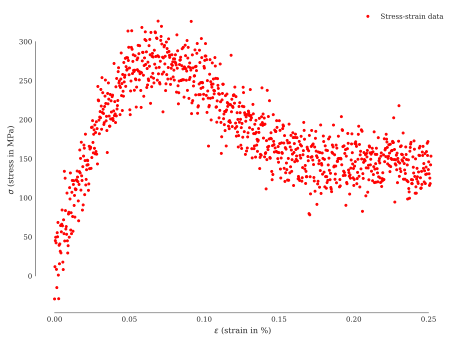

In [8]:
# Strain
x = data[:, 0]
# Stress in MPa
y = data[:, 1]

plt.figure()
plt.plot(
    x,
    y,
    'ro',
    markersize=2,
    label='Stress-strain data'
)
plt.xlabel('$\epsilon$ (strain in %)')
plt.ylabel('$\sigma$ (stress in MPa)')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

Note that you don't necessarily get a unique stress for each particular value of the strain.
This is because the atoms are jiggling around due to thermal effects.
So, there is always this "jiggling" noise when measuring the stress and the strain.
We want to process this noise to extract what is known as the [stress-strain curve](https://en.wikipedia.org/wiki/Stress–strain_curve) of the material.
The stress-strain curve is a macroscopic property of the material, affected by the fine structure, e.g., the chemical bonds, the crystalline structure, any defects, etc.
It is a required input to the mechanics of materials.

## Part A - Fitting the stress-strain curve in the elastic regime
The very first part of the stress-strain curve should be linear.
It is called the *elastic regime*.
In that region, say $\epsilon < \epsilon_l=0.04$, the relationship between stress and strain is:

$$
\sigma(\epsilon) = E\epsilon.
$$

The constant $E$ is known as the *Young modulus* of the material.
Assume that you measure $\epsilon$ without noise, but your measured $\sigma$ is noisy.

### Subpart A.I
First, extract the relevant data for this problem, split it into training and validation datasets, and visualize the training and validation datasets using different colors.

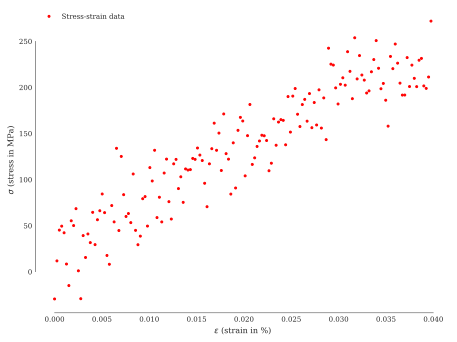

In [9]:
# The point at which the stress-strain curve stops being linear
epsilon_l = 0.04
# Relevant data (this is nice way to get the linear part of the stresses and straints)
x_rel = x[x < 0.04]
y_rel = y[x < 0.04]

# Visualize to make sure you have the right data
plt.figure()
plt.plot(
    x_rel,
    y_rel,
    'ro',
    markersize=2,
    label='Stress-strain data'
)
plt.xlabel('$\epsilon$ (strain in %)')
plt.ylabel('$\sigma$ (stress in MPa)')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

Split your data into training and validation.

**Hint:** You may use [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if you wish.

In [10]:
# Split the data into training and validation datasets
# Hint: Consult the lecture notes
# x_train, y_train, x_valid, y_valid = # Your code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, ARDRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
# Reshape for sklearn
x_rel_reshaped = x_rel.reshape(-1, 1)

# Split the data into training and validation
x_train, x_valid, y_train, y_valid = train_test_split(x_rel_reshaped, y_rel, test_size=0.2, random_state=42)

Use the following to visualize your split:

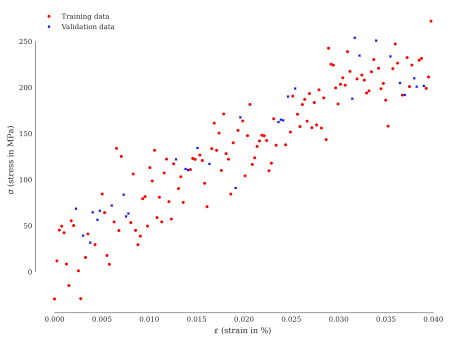

In [11]:
plt.figure()
plt.plot(
    x_train,
    y_train,
    'ro',
    markersize=2,
    label='Training data'
)
plt.plot(
    x_valid,
    y_valid,
    'bx',
    markersize=2,
    label='Validation data'
)
plt.xlabel('$\epsilon$ (strain in %)')
plt.ylabel('$\sigma$ (stress in MPa)')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

### Subpart A.II
Perform Bayesian linear regression with the evidence approximation to estimate the noise variance and the hyperparameters of the prior.

In [12]:
# Your code here

model_A = BayesianRidge(fit_intercept=False)
model_A.fit(x_train, y_train)

# The estimated Young's Modulus, E, is the coefficient
E_estimated = model_A.coef_[0]
# The estimated noise variance is alpha_
noise_variance_A = 1. / model_A.alpha_

print(f"Estimated Young's Modulus (E): {E_estimated:.2f} MPa")
print(f"Estimated Noise Variance (sigma^2): {noise_variance_A:.2f} MPa^2")

Estimated Young's Modulus (E): 6430.18 MPa
Estimated Noise Variance (sigma^2): 841.81 MPa^2


### Subpart A.III
Calculate the mean square error of the validation data.

In [13]:
# your code here
# I did this in 2 ways to compare
y_pred = model_A.predict(x_valid)
mse1 = np.mean((y_valid - y_pred)**2)
print(f'MSE: {mse1:.4f}')

# 2. Calculate mean square error on validation data using sklearn
from sklearn.metrics import mean_squared_error

y_pred_A, y_std_A = model_A.predict(x_valid, return_std=True)
mse_A = mean_squared_error(y_valid, y_pred_A)

print(f"Mean Square Error (Validation): {mse_A:.2f}")

MSE: 1001.4959
Mean Square Error (Validation): 1001.50


### Subpart A.IV
Make the observations vs predictions plot for the validation data.

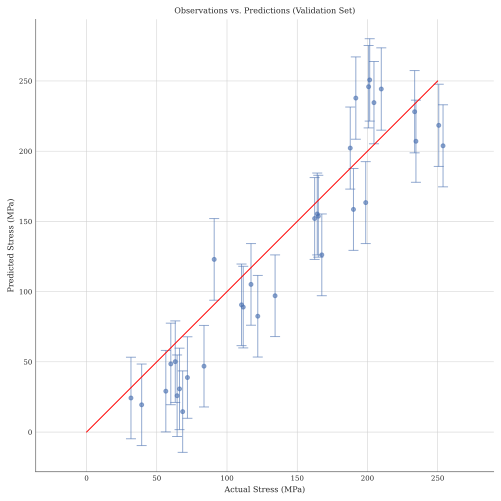

In [20]:
# your code here

# Observations vs. Predictions plot for validation data
plt.figure(figsize=(7, 7))
plt.errorbar(y_valid, y_pred_A, yerr=y_std_A, fmt='o', capsize=5, alpha=0.6)
plt.plot([0, 250], [0, 250], 'r-')
plt.xlabel("Actual Stress (MPa)")
plt.ylabel("Predicted Stress (MPa)")
plt.title("Observations vs. Predictions (Validation Set)")
plt.axis('equal')
plt.grid(True)
sns.despine()
plt.show()

### Subpart A.V
Compute and plot the standardized errors for the validation data.

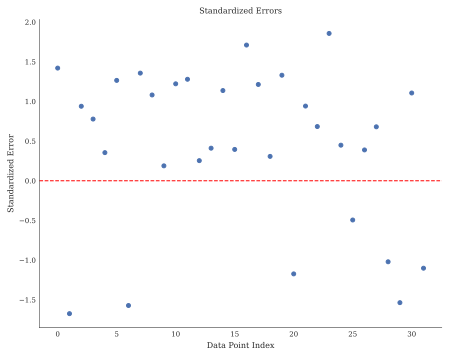

In [21]:
# your code here

standardized_errors_A = (y_valid - y_pred_A) / y_std_A

plt.figure(figsize=(12, 5))

# Plot standardized errors
plt.subplot(1, 2, 1)
plt.plot(standardized_errors_A, 'o')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Data Point Index")
plt.ylabel("Standardized Error")
plt.title("Standardized Errors")
sns.despine()

### Subpart A.VI
Make the quantile-quantile plot of the standardized errors.

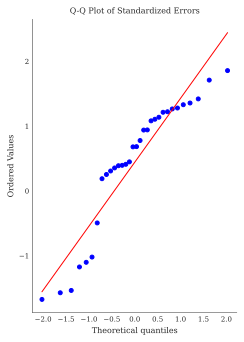

In [22]:
# your code here
plt.subplot(1, 2, 2)
stats.probplot(standardized_errors_A, dist="norm", plot=plt)
plt.title("Q-Q Plot of Standardized Errors")
sns.despine()

plt.tight_layout()
plt.show()


### Subpart A.VII
Visualize your epistemic and the aleatory uncertainty about the stress-strain curve in the elastic regime.

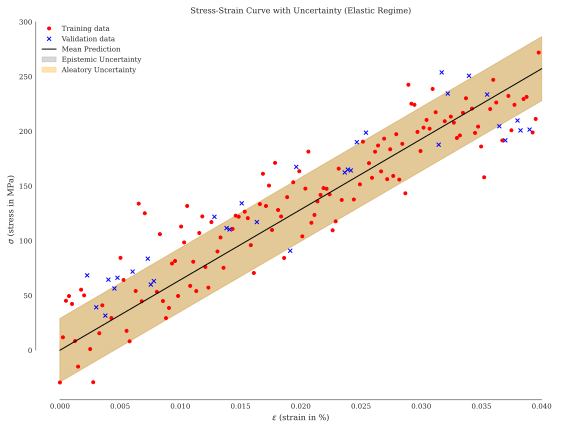

In [24]:
# your code here
# Visualize epistemic and aleatory uncertainty
x_plot = np.linspace(0, epsilon_l, 100).reshape(-1, 1)
y_plot_mean, y_plot_std = model_A.predict(x_plot, return_std=True)

plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, 'ro', markersize=3, label='Training data')
plt.plot(x_valid, y_valid, 'bx', markersize=4, label='Validation data')
plt.plot(x_plot, y_plot_mean, 'k-', label='Mean Prediction')

# Epistemic uncertainty
plt.fill_between(x_plot.flatten(), y_plot_mean - y_plot_std, y_plot_mean + y_plot_std, color='gray', alpha=0.3, label='Epistemic Uncertainty')

# Aleatory uncertainty
aleatory_std = np.sqrt(noise_variance_A)
plt.fill_between(x_plot.flatten(), y_plot_mean - aleatory_std, y_plot_mean + aleatory_std, color='orange', alpha=0.3, label='Aleatory Uncertainty')


plt.xlabel('$\epsilon$ (strain in %)')
plt.ylabel('$\sigma$ (stress in MPa)')
plt.title('Stress-Strain Curve with Uncertainty (Elastic Regime)')
plt.legend()
sns.despine(trim=True)
plt.show()

### Subpart A. VIII
Visualize the posterior of the Young modulus E conditioned on the data.

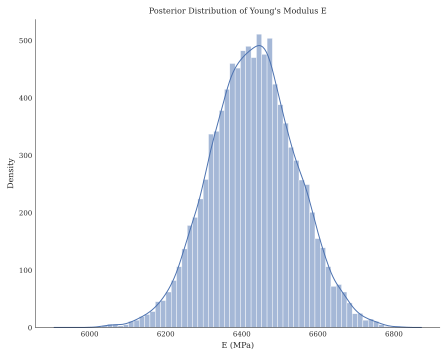

In [25]:
# your code here
# The posterior is a Gaussian distribution with mean and std dev from the model
E_mean = model_A.coef_[0]
E_cov = model_A.sigma_[0, 0]
E_std = np.sqrt(E_cov)

E_posterior_samples = np.random.normal(E_mean, E_std, 10000)

plt.figure(figsize=(12, 5))

# Visualize the posterior distribution
plt.subplot(1, 2, 1)
sns.histplot(E_posterior_samples, kde=True)
plt.title("Posterior Distribution of Young's Modulus E")
plt.xlabel("E (MPa)")
plt.ylabel("Density")
sns.despine()


### Subpart A.IX
Take five samples of stress-strain curve in the elastic regime and visualize them.

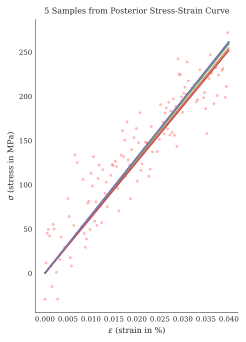

In [26]:
# your code here

plt.subplot(1, 2, 2)
plt.plot(x_train, y_train, 'ro', markersize=2, alpha=0.2, label='Training Data')
for i in range(5):
    E_sample = np.random.normal(E_mean, E_std)
    plt.plot(x_plot, E_sample * x_plot, lw=1.5)
plt.title("5 Samples from Posterior Stress-Strain Curve")
plt.xlabel('$\epsilon$ (strain in %)')
plt.ylabel('$\sigma$ (stress in MPa)')
sns.despine()

plt.tight_layout()
plt.show()

### Subpart A.X

Find the 95% centered credible interval for the Young modulus $E$.

In [27]:
# your code here

credible_interval_E = np.percentile(E_posterior_samples, [2.5, 97.5])
print(f"Posterior Mean for E: {E_mean:.2f} MPa")
print(f"95% Credible Interval for E: [{credible_interval_E[0]:.2f}, {credible_interval_E[1]:.2f}] MPa")

Posterior Mean for E: 6430.18 MPa
95% Credible Interval for E: [6208.90, 6653.47] MPa


### Subpart A.XI
If you had to pick a single value for the Young modulus $E$, what would it be and why?

In [28]:
# your code here
print(f"Posterior Mean for E: {E_mean:.2f} MPa")

Posterior Mean for E: 6430.18 MPa


*Your answer here*
I would choose the posterior mean, because it minimizes the expected squared error as well as represents the most probable value given the data and the model we have available.

## Part B - Estimate the ultimate strength

The pick of the stress-strain curve is known as the ultimate strength.
We want to estimate it.

### Subpart B.I - Extract training and validation data

Extract training and validation data from the entire dataset.

In [29]:
# your code here - Repeat as many text and code blocks as you like
# x_train, y_train, x_valid, y_valid = # Your code
# Reshape full dataset for sklearn
x_full_reshaped = x.reshape(-1, 1)

# Split the full data into training and validation
x_train_full, x_valid_full, y_train_full, y_valid_full = train_test_split(x_full_reshaped, y, test_size=0.2, random_state=42)

Use the following to visualize your split:

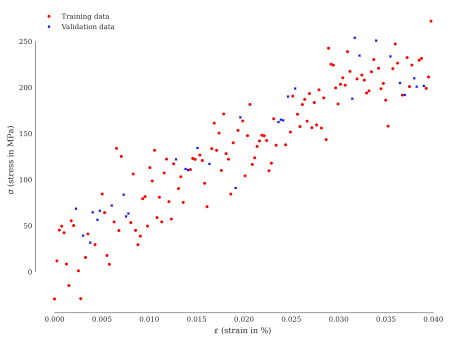

In [30]:
plt.figure()
plt.plot(
    x_train,
    y_train,
    'ro',
    markersize=2,
    label='Training data'
)
plt.plot(
    x_valid,
    y_valid,
    'bx',
    markersize=2,
    label='Validation data'
)
plt.xlabel('$\epsilon$ (strain in %)')
plt.ylabel('$\sigma$ (stress in MPa)')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

### Subpart B.II - Model the entire stress-strain relationship.
To do this, we will set up a generalized linear model to capture the entire stress-strain relationship.
Remember, you can use any model you want as soon as:
+ It is linear in the parameters to be estimated,
+ It has a well-defined elastic regime (see Part A).

I am going to help you set up the right model.
We will use the [Heavide step function](https://en.wikipedia.org/wiki/Heaviside_step_function) to turn on or off models for various ranges of $\epsilon$. The idea is quite simple: We will use a linear model for the elastic regime, and we are going to turn to a non-linear model for the non-linear regime.
Here is a model that has the right form in the elastic regime and an arbitrary form in the non-linear regime:

$$
f(\epsilon;E,\mathbf{w}_g) = E\epsilon \left[(1 - H(\epsilon - \epsilon_l)\right] + g(\epsilon;\mathbf{w}_g)H(\epsilon - \epsilon_l),
$$

where

$$
H(x) = \begin{cases}
0,\;\text{if}\;x < 0\\
1,\;\text{otherwise},
\end{cases}
$$

and $g$ is any function linear in the parameters $\mathbf{w}_g$.

You can use any model you like for the non-linear regime, but let's use a polynomial of degree $d$:

$$
g(\epsilon) = \sum_{i=0}^{d} w_i \epsilon^i.
$$

The full model can be expressed as:

$$
\begin{split}
f(\epsilon) &=
\begin{cases}
h(\epsilon) = E \epsilon,\ \epsilon < \epsilon_l, \\
g(\epsilon) = \sum_{i=0}^{d} w_i \epsilon^i, \epsilon \geq \epsilon_l
\end{cases}\\
&= E\epsilon \left(1 - H(\epsilon - \epsilon_l)\right) + \sum_{i=0}^{d} w_i \epsilon^iH(\epsilon - \epsilon_l).
\end{split}
$$

We could proceed with this model, but there is a small problem: It is discontinuous at $\epsilon = \epsilon_l$.
This is unphysical. We can do better than that!

To make the model nice, we force the $h$ and $g$ to match up to the first derivative, i.e., we demand that:

$$
\begin{split}
h(\epsilon_l) &= g(\epsilon_l)\\
h'(\epsilon_l) &= g'(\epsilon_l).
\end{split}
$$

We include the first derivative because we don't have a kink in the stress-strain. That would also be unphysical.
The two equations above become:

$$
\begin{split}
E\epsilon_l &= \sum_{i=0}^dw_i\epsilon_l^i\\
E &= \sum_{i=1}^diw_i\epsilon_l^{i-1}.
\end{split}
$$

We can use these two equations to eliminate two weights.
Let's eliminate $w_0$ and $w_1$.
All you have to do is express them in terms of $E$ and $w_2,\dots,w_d$.
So, there remain $d$ parameters to estimate.
Let's get back to the stress-strain model.

Our stress-strain model was:

$$
f(\epsilon) = E\epsilon \left(1 - H(\epsilon - \epsilon_l)\right) + \sum_{i=0}^{d} w_i \epsilon^iH(\epsilon - \epsilon_l).
$$

We can now use the expressions for $w_0$ and $w_1$ to rewrite this using only all the other
parameters.
I am going to spare you the details.
The result is:

$$
f(\epsilon) = E\epsilon + \sum_{i=2}^dw_i\left[(i-1)\epsilon_{l}^{i} - i \epsilon \epsilon_{l}^{i-1} + \epsilon^i\right]H(\epsilon - \epsilon_l).
$$

Okay.
This is still a generalized linear model. This is nice.
Write code for the design matrix:

In [31]:
# Complete this code to make your model:
def compute_design_matrix(Epsilon, epsilon_l, d):
    """Compute the design matrix for the stress-strain curve problem.

    Arguments:
        Epsilon     -     A 1D array of dimension N.
        epsilon_l   -     The strain signifying the end of the elastic regime.
        d           -     The polynomial degree.

    Returns:
        A design matrix N x d
    """
    # Sanity check
    assert isinstance(Epsilon, np.ndarray)
    assert Epsilon.ndim == 1, 'Pass the array as epsilon.flatten(), if it is two dimensional'
    n = Epsilon.shape[0]
    # The design matrix:
    Phi = np.ndarray((n, d))
    Step = np.heaviside(Epsilon - epsilon_l, 1)
    # The step function evaluated at all the elements of Epsilon.
    # You can use it if you want.
    Phi[:, 0] = Epsilon

    # Columns for weights w_2 to w_d
    for i in range(2, d + 1):
        term = (i - 1) * epsilon_l**i - i * Epsilon * epsilon_l**(i - 1) + Epsilon**i
        Phi[:, i - 1] = term * Step

    return Phi

Visualize the basis functions here:

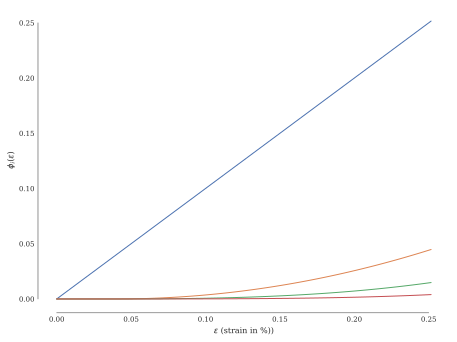

In [33]:
d = 4
eps = np.linspace(0, x.max(), 100)
Phis = compute_design_matrix(eps, epsilon_l, d)
fig, ax = plt.subplots(dpi=100)
ax.plot(eps, Phis)
ax.set_xlabel('$\epsilon$ (strain in %))')
ax.set_ylabel('$\phi_i(\epsilon)$')
sns.despine(trim=True);


### Subpart B.III

Fit the model using automatic relevance determination and demonstrate that it works well by doing everything we did above (MSE, observations vs. predictions plot, standardized errors, etc.).

Final Weights (E and w_i): [    5440.25187072  -242551.17992293  1124550.33144046 -1794173.35862738]
Mean Square Error (Validation): 691.72


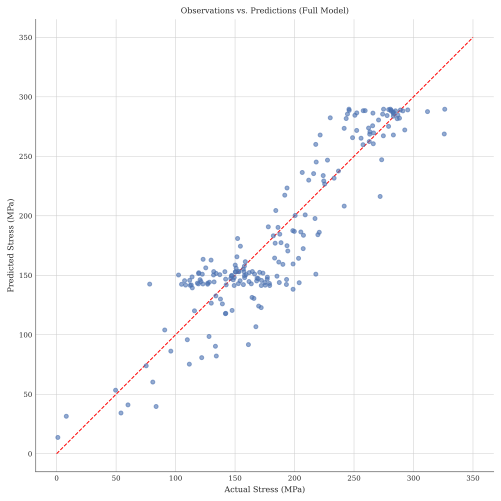

In [36]:
# Your code here - Use as many blocks as you need!
# model = # Just call the resulting model "model"

Phi_train = compute_design_matrix(x_train_full.flatten(), epsilon_l, d)
Phi_valid = compute_design_matrix(x_valid_full.flatten(), epsilon_l, d)

# Fit the ARD model
model_B = ARDRegression(fit_intercept=False, tol=1e-4)
model_B.fit(Phi_train, y_train_full)

# Predictions and MSE for validation data
y_pred_B, y_std_B = model_B.predict(Phi_valid, return_std=True)
mse_B = mean_squared_error(y_valid_full, y_pred_B)

print(f"Final Weights (E and w_i): {model_B.coef_}")
print(f"Mean Square Error (Validation): {mse_B:.2f}")

# Observations vs. Predictions plot
plt.figure(figsize=(7, 7))
plt.errorbar(y_valid_full, y_pred_B, fmt='o', capsize=5, alpha=0.6)
plt.plot([0, 350], [0, 350], 'r--')
plt.xlabel("Actual Stress (MPa)")
plt.ylabel("Predicted Stress (MPa)")
plt.title("Observations vs. Predictions (Full Model)")
plt.axis('equal')
plt.grid(True)
sns.despine()
plt.show()

### Subpart B.IV
Visualize the epistemic and aleatory uncertainty in the stess-strain relation.

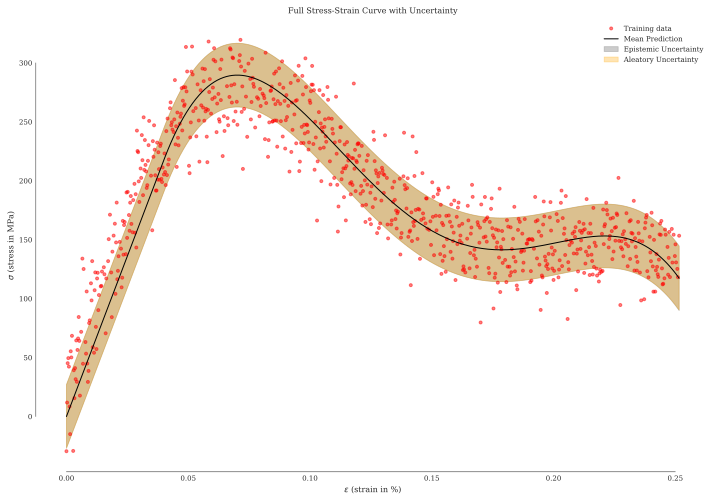

In [37]:
# Your code here

x_plot_full = np.linspace(0, x.max(), 200)
Phi_plot = compute_design_matrix(x_plot_full, epsilon_l, d)
y_plot_mean_B, y_plot_std_B = model_B.predict(Phi_plot, return_std=True)
noise_variance_B = 1. / model_B.alpha_

plt.figure(figsize=(10, 7))
plt.plot(x_train_full, y_train_full, 'ro', markersize=3, label='Training data', alpha=0.5)
plt.plot(x_plot_full, y_plot_mean_B, 'k-', label='Mean Prediction')

# Epistemic uncertainty
plt.fill_between(x_plot_full, y_plot_mean_B - y_plot_std_B, y_plot_mean_B + y_plot_std_B, color='gray', alpha=0.4, label='Epistemic Uncertainty')

# Aleatory uncertainty
aleatory_std_B = np.sqrt(noise_variance_B)
plt.fill_between(x_plot_full, y_plot_mean_B - aleatory_std_B, y_plot_mean_B + aleatory_std_B, color='orange', alpha=0.3, label='Aleatory Uncertainty')

plt.xlabel('$\epsilon$ (strain in %)')
plt.ylabel('$\sigma$ (stress in MPa)')
plt.title('Full Stress-Strain Curve with Uncertainty')
plt.legend()
sns.despine(trim=True)
plt.show()

### Subpart B.V - Extract the ultimate strength

Now, you will quantify your epistemic uncertainty about the ultimate strength.
The ultimate strength is the maximum of the stress-strain relationship.
Since you have epistemic uncertainty about the stress-strain relationship, you also have epistemic uncertainty about the ultimate strength.

Do the following:
- Visualize the posterior of the ultimate strength.
- Find a 95% credible interval for the ultimate strength.
- Pick a value for the ultimate strength.

**Hint:**
To characterize your epistemic uncertainty about the ultimate strength, you would have to do the following:
- Define a dense set of strain points between 0 and 0.25.
- Repeatedly:
 + Sample from the posterior of the weights of your model
 + For each sample, evaluate the stresses at the dense set of strain points defined earlier
 + For each sampled stress vector, find the maximum. This is a sample of the ultimate strength.

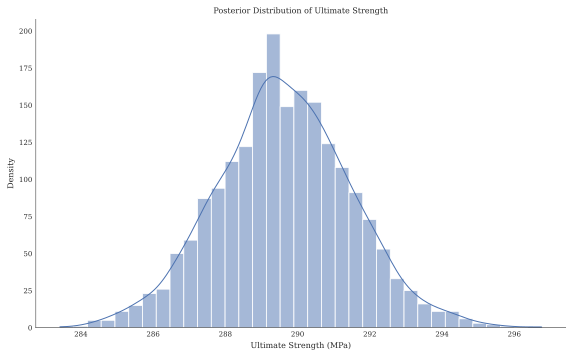

Chosen value for Ultimate Strength (Posterior Mean): 289.62 MPa
95% Credible Interval for Ultimate Strength: [285.85, 293.35] MPa


In [38]:
# Enter your code here
# Sample from the posterior of the weights
num_samples = 2000
weights_samples = np.random.multivariate_normal(model_B.coef_, model_B.sigma_, num_samples)

# Evaluate the model for each weight sample
Phi_plot = compute_design_matrix(eps, epsilon_l, d)
stress_samples = weights_samples @ Phi_plot.T

# Find the maximum stress for each sample curve
ultimate_strength_samples = stress_samples.max(axis=1)

# Visualize the posterior of the ultimate strength
plt.figure(figsize=(8, 5))
sns.histplot(ultimate_strength_samples, kde=True)
plt.title("Posterior Distribution of Ultimate Strength")
plt.xlabel("Ultimate Strength (MPa)")
plt.ylabel("Density")
sns.despine()
plt.show()

# Find a 95% credible interval for the ultimate strength
credible_interval_strength = np.percentile(ultimate_strength_samples, [2.5, 97.5])

# Pick a value for the ultimate strength
ultimate_strength_mean = ultimate_strength_samples.mean()

print(f"Chosen value for Ultimate Strength (Posterior Mean): {ultimate_strength_mean:.2f} MPa")
print(f"95% Credible Interval for Ultimate Strength: [{credible_interval_strength[0]:.2f}, {credible_interval_strength[1]:.2f}] MPa")

# Problem 2 - Optimizing the performance of a compressor

In this problem, we will need [this](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/compressor_data.xlsx) dataset. The dataset was kindly provided to us by [Professor Davide Ziviani](https://scholar.google.com/citations?user=gPdAtg0AAAAJ&hl=en).
As before, you can either put it on your Google Drive or just download it with the code segment below:

In [39]:
url = "https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/lecturebook/data/compressor_data.xlsx"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14771  100 14771    0     0   128k      0 --:--:-- --:--:-- --:--:--  127k


Note that this is an Excel file, so we need pandas to read it.
Here is how:

In [40]:
import pandas as pd
data = pd.read_excel('compressor_data.xlsx')
data

,T_e,DT_sh,T_c,DT_sc,T_amb,f,m_dot,m_dot.1,Capacity,Power,Current,COP,Efficiency
0,-30,11,25,8,35,60,28.8,8.000000,1557,901,4.4,1.73,0.467
1,-30,11,30,8,35,60,23.0,6.388889,1201,881,4.0,1.36,0.425
2,-30,11,35,8,35,60,17.9,4.972222,892,858,3.7,1.04,0.382
3,-25,11,25,8,35,60,46.4,12.888889,2509,1125,5.3,2.23,0.548
4,-25,11,30,8,35,60,40.2,11.166667,2098,1122,5.1,1.87,0.519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,10,11,45,8,35,60,245.2,68.111111,12057,2525,11.3,4.78,0.722
61,10,11,50,8,35,60,234.1,65.027778,10939,2740,12.3,3.99,0.719
62,10,11,55,8,35,60,222.2,61.722222,9819,2929,13.1,3.35,0.709
63,10,11,60,8,35,60,209.3,58.138889,8697,3091,13.7,2.81,0.693


The data are part of an experimental study of a variable-speed reciprocating compressor.
The experimentalists varied two temperatures, $T_e$ and $T_c$ (both in C), and they measured various other quantities.
We aim to learn the map between $T_e$ and $T_c$ and measure Capacity and Power (both in W).
First, let's see how you can extract only the relevant data.

In [41]:
# Here is how to extract the T_e and T_c columns and put them in a single numpy array
x = data[['T_e','T_c']].values
x

array([[-30,  25],
       [-30,  30],
       [-30,  35],
       [-25,  25],
       [-25,  30],
       [-25,  35],
       [-25,  40],
       [-25,  45],
       [-20,  25],
       [-20,  30],
       [-20,  35],
       [-20,  40],
       [-20,  45],
       [-20,  50],
       [-15,  25],
       [-15,  30],
       [-15,  35],
       [-15,  40],
       [-15,  45],
       [-15,  50],
       [-15,  55],
       [-10,  25],
       [-10,  30],
       [-10,  35],
       [-10,  40],
       [-10,  45],
       [-10,  50],
       [-10,  55],
       [-10,  60],
       [ -5,  25],
       [ -5,  30],
       [ -5,  35],
       [ -5,  40],
       [ -5,  45],
       [ -5,  50],
       [ -5,  55],
       [ -5,  60],
       [ -5,  65],
       [  0,  25],
       [  0,  30],
       [  0,  35],
       [  0,  40],
       [  0,  45],
       [  0,  50],
       [  0,  55],
       [  0,  60],
       [  0,  65],
       [  5,  25],
       [  5,  30],
       [  5,  35],
       [  5,  40],
       [  5,  45],
       [  5,

In [42]:
# Here is how to extract the Capacity
y = data['Capacity'].values
y

array([ 1557,  1201,   892,  2509,  2098,  1726,  1398,  1112,  3684,
        3206,  2762,  2354,  1981,  1647,  5100,  4547,  4019,  3520,
        3050,  2612,  2206,  6777,  6137,  5516,  4915,  4338,  3784,
        3256,  2755,  8734,  7996,  7271,  6559,  5863,  5184,  4524,
        3883,  3264, 10989, 10144,  9304,  8471,  7646,  6831,  6027,
        5237,  4461, 13562, 12599, 11633, 10668,  9704,  8743,  7786,
        6835,  5891, 16472, 15380, 14279, 13171, 12057, 10939,  9819,
        8697,  7575])

Fit the following multivariate polynomial model to **both the Capacity and the Power**:

$$
y = w_1 + w_2T_e + w_3 T_c + w_4 T_eT_c + w_5 T_e^2 + w_6T_c^2 + w_7 T_e^2T_c + w_8T_eT_c^2 + w_9 T_e^3 + w_{10}T_c^3 + \epsilon,
$$

where $\epsilon$ is a Gaussian noise term with unknown variance.

**Hints:**
+ You may use [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to construct the design matrix of your polynomial features. Do not program the design matrix by hand.
+ You should split your data into training and validation and use various validation metrics to ensure your models make sense.
+ Use [ARD Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html#sklearn.linear_model.ARDRegression) to fit any hyperparameters and the noise.

## Part A - Fit the capacity

### Subpart A.I

Please don't just fit. Split in training and test and use all the usual diagnostics.

Capacity Model MSE (Validation): 854.28


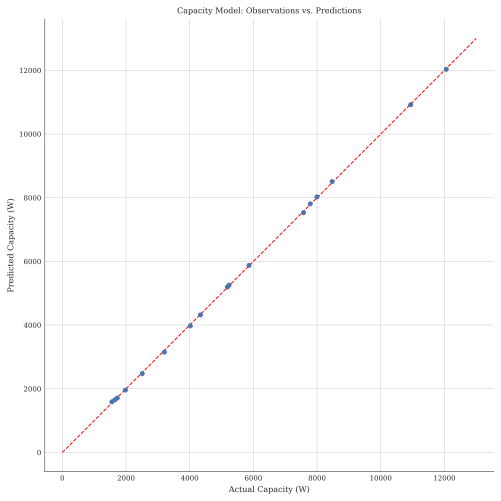

In [44]:
# your code here - Repeat as many text and code blocks as you like
from sklearn.preprocessing import PolynomialFeatures

compressor_data = pd.read_excel('compressor_data.xlsx')

X_comp = compressor_data[['T_e', 'T_c']].values
y_cap = compressor_data['Capacity'].values
y_pow = compressor_data['Power'].values

# Create polynomial features of degree 3
poly = PolynomialFeatures(degree=3, include_bias=True)
Phi_comp = poly.fit_transform(X_comp)

# Split data for Capacity model
X_train_cap, X_valid_cap, y_train_cap, y_valid_cap = train_test_split(Phi_comp, y_cap, test_size=0.25, random_state=42)

# Split data for Power model
X_train_pow, X_valid_pow, y_train_pow, y_valid_pow = train_test_split(Phi_comp, y_pow, test_size=0.25, random_state=42)

# Fit ARD model for Capacity
ard_cap = ARDRegression(tol=1e-4)
ard_cap.fit(X_train_cap, y_train_cap)

# Validation
y_pred_cap, y_std_cap = ard_cap.predict(X_valid_cap, return_std=True)
mse_cap = mean_squared_error(y_valid_cap, y_pred_cap)
print(f"Capacity Model MSE (Validation): {mse_cap:.2f}")

# Observations vs. Predictions plot
plt.figure(figsize=(7, 7))
plt.errorbar(y_valid_cap, y_pred_cap, fmt='o', capsize=5)
plt.plot([0, 13000], [0, 13000], 'r--')
plt.xlabel("Actual Capacity (W)")
plt.ylabel("Predicted Capacity (W)")
plt.title("Capacity Model: Observations vs. Predictions")
plt.axis('equal')
plt.grid(True)
sns.despine()
plt.show()

### Subpart A.II

What is the noise variance you estimated for the Capacity?

In [45]:
# your code here
noise_variance_cap = 1. / ard_cap.alpha_
print(f"Estimated Noise Variance for Capacity: {noise_variance_cap:.2f} W^2")

Estimated Noise Variance for Capacity: 1262.34 W^2


### Subpart A.III
Which features of the temperatures (basis functions of your model) are the most important for predicting the Capacity?

In [46]:
# your code here
feature_names = poly.get_feature_names_out(['Te', 'Tc'])
cap_coeffs = pd.Series(ard_cap.coef_, index=feature_names).sort_values(ascending=False)

print("Most Important Features for Predicting Capacity:")
print(cap_coeffs[abs(cap_coeffs) > 1e-2])

Most Important Features for Predicting Capacity:
Te         561.127213
Te^2         6.212056
Tc^2         0.189671
Te^2 Tc     -0.027254
Te Tc^2     -0.034856
Te Tc       -2.330498
Tc        -181.618168
dtype: float64


## Part B - Fit the Power

### Subpart B.I

Please don't just fit. Split in training and test and use all the usual diagnostics.

Power Model MSE (Validation): 959.26


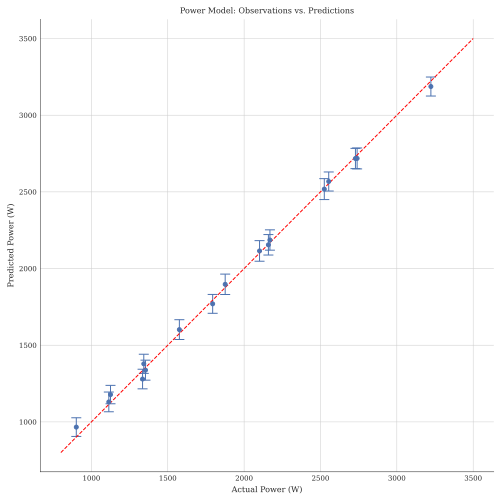

In [48]:
# your code here - Repeat as many text and code blocks as you like
# Fit ARD model for Power
ard_pow = ARDRegression(tol=1e-4)
ard_pow.fit(X_train_pow, y_train_pow)

# Validation
y_pred_pow, y_std_pow = ard_pow.predict(X_valid_pow, return_std=True)
mse_pow = mean_squared_error(y_valid_pow, y_pred_pow)
print(f"Power Model MSE (Validation): {mse_pow:.2f}")

# Observations vs. Predictions plot
plt.figure(figsize=(7, 7))
plt.errorbar(y_valid_pow, y_pred_pow, yerr=y_std_pow, fmt='o', capsize=5)
plt.plot([800, 3500], [800, 3500], 'r--')
plt.xlabel("Actual Power (W)")
plt.ylabel("Predicted Power (W)")
plt.title("Power Model: Observations vs. Predictions")
plt.axis('equal')
plt.grid(True)
sns.despine()
plt.show()

### Subpart B.II

What is the noise variance you estimated for the Power?

In [49]:
# your code here
noise_variance_pow = 1. / ard_pow.alpha_
print(f"Estimated Noise Variance for Power: {noise_variance_pow:.2f} W^2")

Estimated Noise Variance for Power: 772.83 W^2


### Subpart B.III
Which features of the temperatures (basis functions of your model) are the most important for predicting the Power?

In [50]:
# your code here
pow_coeffs = pd.Series(ard_pow.coef_, index=feature_names).sort_values(ascending=False)
print("Most Important Features for Predicting Power:")
print(pow_coeffs[abs(pow_coeffs) > 1e-2])

Most Important Features for Predicting Power:
Tc       64.486444
Te Tc     1.719007
Tc^2     -0.438438
Te^2     -0.832370
Te      -46.314543
dtype: float64


# Problem 3 - Explaining the Challenger disaster
On January 28, 1986, the [Space Shuttle Challenger](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster) disintegrated after 73 seconds from launch.
The failure can be traced to the rubber O-rings, which were used to seal the joints of the solid rocket boosters (required to force the hot, high-pressure gases generated by the burning solid propellant through the nozzles, thus producing thrust).

The performance of the O-ring material was sensitive to the external temperature during launch.
This [dataset](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/challenger_data.csv) contains records of different experiments with O-rings recorded at various times between 1981 and 1986.
Download the data the usual way (either put them on Google Drive or run the code cell below).

In [51]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/challenger_data.csv"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


Even though this is a CSV file, you should load it with pandas because it contains some special characters.

In [52]:
raw_data = pd.read_csv('https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/challenger_data.csv')
raw_data

,Date,Temperature,Damage Incident
0,04/12/1981,66,0
1,11/12/1981,70,1
2,3/22/82,69,0
3,6/27/82,80,NaN
4,01/11/1982,68,0
5,04/04/1983,67,0
6,6/18/83,72,0
7,8/30/83,73,0
8,11/28/83,70,0
9,02/03/1984,57,1


The first column is the date of the record. The second column is the external temperature of that day in degrees F.
The third column labeled ``Damage Incident`` has a binary coding (0=no damage, 1=damage).
The very last row is the day of the Challenger accident.

We will use the first 23 rows to solve a binary classification problem that will give us the probability of an accident conditioned on the observed external temperature in degrees F. Before proceeding to the data analysis, let's clean the data up.

First, we drop all the bad records:

In [53]:
clean_data_0 = raw_data.dropna()
clean_data_0

,Date,Temperature,Damage Incident
0,04/12/1981,66,0
1,11/12/1981,70,1
2,3/22/82,69,0
4,01/11/1982,68,0
5,04/04/1983,67,0
6,6/18/83,72,0
7,8/30/83,73,0
8,11/28/83,70,0
9,02/03/1984,57,1
10,04/06/1984,63,1


We also don't need the last record. Remember that the temperature on the day of the Challenger accident was 31 degrees F.

In [54]:
clean_data = clean_data_0[:-1]
clean_data

,Date,Temperature,Damage Incident
0,04/12/1981,66,0
1,11/12/1981,70,1
2,3/22/82,69,0
4,01/11/1982,68,0
5,04/04/1983,67,0
6,6/18/83,72,0
7,8/30/83,73,0
8,11/28/83,70,0
9,02/03/1984,57,1
10,04/06/1984,63,1


Let's extract the features and the labels:

In [55]:
x = clean_data['Temperature'].values
x

array([66, 70, 69, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53, 67, 75, 70,
       81, 76, 79, 75, 76, 58])

In [56]:
y = clean_data['Damage Incident'].values.astype(np.float64)
y

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1.])

## Part A - Perform logistic regression

Perform logistic regression between the temperature ($x$) and the damage label ($y$).
Refrain from validating because there is little data.
Just use a simple model so that you don't overfit.

In [60]:
# your code here - Repeat as many text and code blocks as you like
# Extract features and labels
X_challenger = clean_data['Temperature'].values.reshape(-1, 1)
y_challenger = clean_data['Damage Incident'].values.astype(np.float64)

# Perform logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_challenger, y_challenger)

w0 = log_reg.intercept_[0]
w1 = log_reg.coef_[0][0]

print(f"Fitted Model: logit(p) = {w0:.2f} + ({w1:.2f}) * Temperature")

Fitted Model: logit(p) = 14.86 + (-0.23) * Temperature


## Part B - Plot the probability of damage as a function of temperature
Plot the probability of damage as a function of temperature.

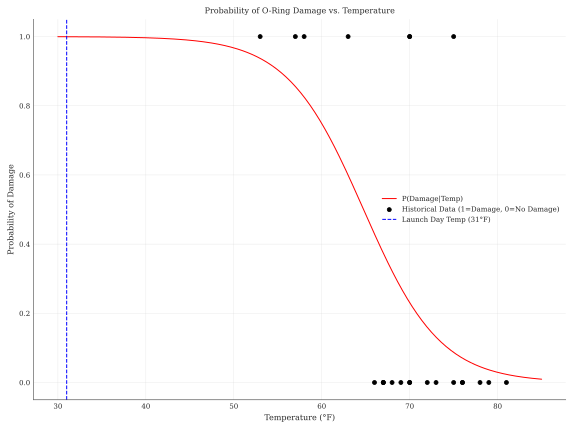

In [61]:
# your code here
# Plot probability of damage vs. temperature
temps = np.linspace(30, 85, 300).reshape(-1, 1)
probs = log_reg.predict_proba(temps)[:, 1]

plt.figure(figsize=(8, 6))
plt.plot(temps, probs, color='red', label='P(Damage|Temp)')
plt.scatter(X_challenger, y_challenger, color='black', zorder=5, label='Historical Data (1=Damage, 0=No Damage)')
plt.axvline(x=31, color='blue', linestyle='--', label='Launch Day Temp (31°F)')
plt.title('Probability of O-Ring Damage vs. Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Probability of Damage')
plt.legend()
plt.grid(True, alpha=0.4)
sns.despine()
plt.show()

## Part C - Decide whether or not to launch

The temperature on the day of the Challenger accident was 31 degrees F.
Start by calculating the probability of damage at 31 degrees F.
Then, use formal decision-making (i.e., define a cost matrix and make decisions by minimizing the expected loss) to decide whether or not to launch on that day.
Also, plot your optimal decision as a function of the external temperature.

In [62]:
# your code here - Repeat as many text and code blocks as you like
temp_launch = 31
prob_damage_at_31 = log_reg.predict_proba([[temp_launch]])[0, 1]

print(f"The predicted probability of O-ring damage at 31°F is: {prob_damage_at_31:.2%}")

The predicted probability of O-ring damage at 31°F is: 99.96%


Within the plotted temperature range, 'Launch' is never the optimal decision.


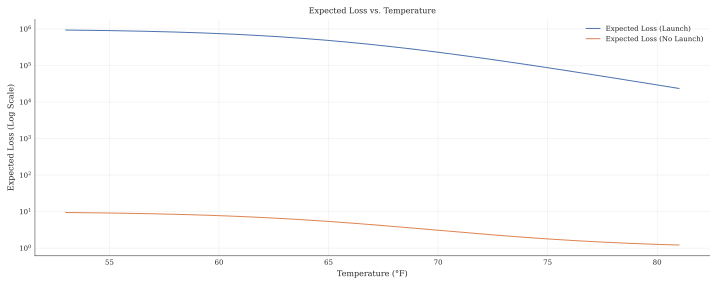

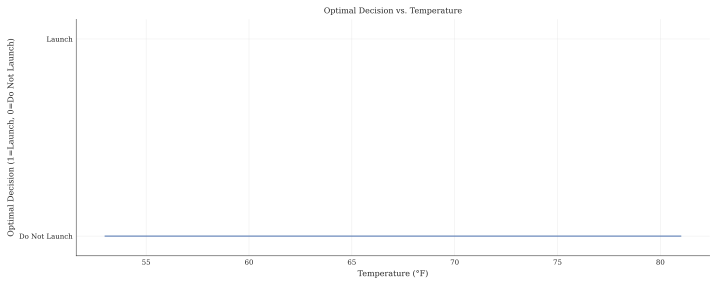

In [87]:
# Plot optimal decision as a function of temperature

# defining the costs:
cost_NLND = 1  # Cost of no launch, no damage (e.g., delay cost)
cost_NLD = 10  # Cost of no launch, damage (e.g., investigation cost even if not launched)
cost_LND = 0   # Cost of launch, no damage (e.g., cost of a successful launch)
cost_LD = 1000000 # Cost of launch, damage (cost of disaster)


loss_launch = cost_LD * probs + cost_LND * (1 - probs)
loss_no_launch = cost_NLD * probs + cost_NLND * (1 - probs)


decision = np.array(['Launch' if l_l < l_nl else 'Do Not Launch' for l_l, l_nl in zip(loss_launch, loss_no_launch)])

plt.figure(figsize=(10, 4))
plt.plot(temps, loss_launch, label='Expected Loss (Launch)')
plt.plot(temps, loss_no_launch, label='Expected Loss (No Launch)')
plt.yscale('log')
plt.title('Expected Loss vs. Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Expected Loss (Log Scale)')
plt.legend()
plt.grid(True, alpha=0.4)
sns.despine()

# Find the decision boundary temperature
launch_indices = np.where(decision == 'Launch')[0]

if launch_indices.size > 0:
    boundary_idx = launch_indices[0]
    boundary_temp = temps[boundary_idx][0]
    print(f"The decision flips at approximately {boundary_temp:.1f}°F. Below this, it's optimal not to launch.")
else:
    print("Within the plotted temperature range, 'Launch' is never the optimal decision.")

plt.show()

# Plot the optimal decision as a function of temperature
plt.figure(figsize=(10, 4))
# Convert 'Launch' to 1 and 'Do Not Launch' to 0 for plotting
decision_numeric = np.where(decision == 'Launch', 1, 0)
plt.plot(temps, decision_numeric, drawstyle='steps-post')
plt.xlabel('Temperature (°F)')
plt.ylabel('Optimal Decision (1=Launch, 0=Do Not Launch)')
plt.title('Optimal Decision vs. Temperature')
plt.grid(True, alpha=0.4)
sns.despine()
plt.ylim(-0.1, 1.1) # Set y-axis limits to clearly show 0 and 1
plt.yticks([0, 1], ['Do Not Launch', 'Launch'])
plt.show()